# 🏢 Financial Distress Prediction

## Predictive Modeling for Financial Distress Analysis

In the dynamic landscape of financial markets, the ability to anticipate and proactively address potential financial distress in companies is paramount for sustainable business operations. This analysis delves into the realm of predictive modeling, leveraging a comprehensive dataset that encapsulates diverse financial features to discern and classify companies facing financial challenges.

**Dataset Overview:**
The dataset at the heart of our analysis encompasses a spectrum of financial metrics, ranging from x1 to x83, and is accompanied by the critical 'Financial Distress' indicator. This indicator serves as the linchpin of our predictive modeling efforts, offering insights into the financial health of companies.

**Objectives:**
Our primary objective is to construct robust predictive models capable of discerning whether a company is undergoing financial distress or maintaining a healthy financial status. Through the exploration of various machine learning techniques, we aim to identify the most effective model for this crucial task.

**Analytical Approach:**

- **Data Exploration and Understanding:* We commence our analysis with a comprehensive exploration of the dataset, gaining insights into the distribution of the target variable and the characteristics of the financial features.

- **Predictive Modeling:* Employing both logistic regression and random forest classifiers, we examine the efficacy of these models under different scenarios, including unbalanced data, oversampling, and undersampling. Our focus is on tuning these models to address the inherent class imbalance and enhance their predictive capabilities.

- **Evaluation Metrics:* The performance of our models is gauged using key metrics such as accuracy, precision, recall, F1 score, and AUC-ROC. This multifaceted evaluation allows us to discern the strengths and weaknesses of each model in predicting financial distress.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score

In [5]:
Distress_data = pd.read_csv("Financial Distress.csv")
Distress_data

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,422,10,0.438020,2.2605,0.202890,0.16037,0.18588,0.175970,0.198400,2.22360,...,100.000,100.00,100.000,17.125,14.5,-7.0,37,0.436380,4,41
3668,422,11,0.482410,1.9615,0.216440,0.20095,0.21642,0.203590,0.189870,1.93820,...,91.500,130.50,132.400,20.000,14.5,-16.0,37,0.438020,5,42
3669,422,12,0.500770,1.7099,0.207970,0.26136,0.21399,0.193670,0.183890,1.68980,...,87.100,175.90,178.100,20.000,14.5,-20.2,37,0.482410,6,43
3670,422,13,0.611030,1.5590,0.185450,0.30728,0.19307,0.172140,0.170680,1.53890,...,92.900,203.20,204.500,22.000,22.0,6.4,37,0.500770,7,44


### Data Exploration and Understanding:

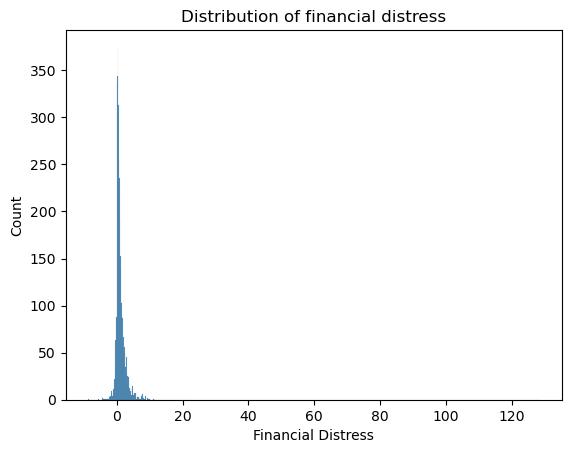

In [12]:
#Examining the distributipon of the target variable "Financial distress"
sns.histplot(x='Financial Distress', data=Distress_data)
plt.title('Distribution of financial distress')
plt.show()



In [13]:
# Understanding the characteristics and distributions of the features
feature_statistics = Distress_data.describe()

# Display the feature statistics
print("Feature Statistics:")
print(feature_statistics)


Feature Statistics:
           Company         Time  Financial Distress           x1           x2  \
count  3672.000000  3672.000000         3672.000000  3672.000000  3672.000000   
mean    182.084423     7.528322            1.040257     1.387820     0.129706   
std     117.024636     4.064016            2.652227     1.452926     0.120013   
min       1.000000     1.000000           -8.631700     0.075170    -0.258080   
25%      80.000000     4.000000            0.172275     0.952145     0.048701   
50%     168.000000     7.000000            0.583805     1.183600     0.107530   
75%     264.250000    11.000000            1.351750     1.506475     0.188685   
max     422.000000    14.000000          128.400000    51.954000     0.749410   

                x3            x4           x5           x6           x7  ...  \
count  3672.000000  3.672000e+03  3672.000000  3672.000000  3672.000000  ...   
mean      0.615769  8.681599e-01     0.154949     0.106717     0.784031  ...   
std       

The majority of the data is centered around 0, but there are outliers, evident from the df.describe() method. While the mean is 1.04, the maximum value reaches 128.4. Since the data is modelled using a Bernoulli distribution and will be binarized, outliers aren't problematic. However, normalization may be preferred before applying it to a Linear Regression model. Our binarization follows a rule: if the value is smaller than -0.5, it indicates financial distress; otherwise, it does not. The apply method can be used for this binarization process.

In [14]:
def determineDistressStatus(x):
    """
    Returns 1 if x is less than -0.5; otherwise, returns 0. 
    1 corresponds to Financial Distress, while 0 signifies Financial Health.
    """
    return 1 if x < -0.5 else 0


In [19]:
Distress_data["target"] = Distress_data["Financial Distress"].apply(
    determineDistressStatus)

df_subset = Distress_data[["Company", "Time", "Financial Distress",
                           "target"]].head()
df_subset

,Company,Time,Financial Distress,target
0,1,1,0.010636,0
1,1,2,-0.455970,0
2,1,3,-0.325390,0
3,1,4,-0.566570,1
4,2,1,1.357300,0


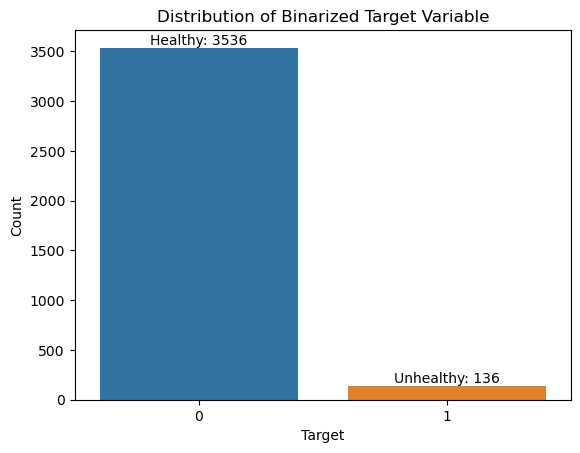

In [23]:
sns.countplot(x='target', data=Distress_data)
plt.title('Distribution of Binarized Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')

# Add labels to the bars
bar_labels = ['Healthy', 'Unhealthy']
for i, label in enumerate(bar_labels):
    plt.text(i,
             Distress_data['target'].value_counts()[i],
             f'{label}: {Distress_data["target"].value_counts()[i]}',
             ha='center',
             va='bottom')

plt.show()


The histogram depicted above indicates a significantly higher frequency of occurrences for financially healthy companies compared to those experiencing financial distress. This imbalance in the dataset is suboptimal. In technical terms, we describe our dataset as being imbalanced. To address this issue, common strategies include oversampling and undersampling. **Oversampling** involves augmenting the number of samples in the minority class, while **undersampling** involves reducing the number of samples in the majority class.

### Data Preprocessing:

In [9]:
print(f"Columns with NaN values: {Distress_data.columns[Distress_data.isna().any()].to_list()}")

Columns with NaN values: []


In [11]:
print(f"Number  of duplicated rows: {Distress_data.duplicated().sum()}")

Number  of duplicated rows: 0


### Data Splitting:
  #### Shuffling the dataset randomly


In [24]:
shuffled_df = Distress_data.sample(frac=1).reset_index(drop=True)

#### Splitting the data into features and target variable

In [25]:
features = shuffled_df.drop(columns=["target", "Company", "Financial Distress", "Time"])
target = shuffled_df["target"]

#### Dividing the data into training and testing sets

In [26]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

#### Creating a validation set







In [27]:
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size=0.2,
                                                  random_state=42)


#### Utilizing the SelectKBest class to extract the top 15 optimal features


In [28]:
selected_features = SelectKBest(score_func=f_classif, k=15)
fit_features = selected_features.fit(X_train, y_train)

#### Obtaining feature scores


In [29]:
scores_df = pd.DataFrame(fit_features.scores_)
columns_df = pd.DataFrame(X_train.columns)

#### Combining two dataframes for enhanced visualization


In [30]:
selected_feature_scores = pd.concat([columns_df, scores_df], axis=1)
selected_feature_scores.columns = ["Features", "Score"]

#### Displaying the 15 best features




In [31]:
top_features = pd.DataFrame(selected_feature_scores.nlargest(15, "Score"))
top_features

,Features,Score
13,x14,276.027730
48,x49,259.738473
8,x9,151.401904
1,x2,114.303992
2,x3,104.636695
12,x13,104.636677
9,x10,100.060784
4,x5,91.886717
36,x37,81.389263
23,x24,71.847646


Now that we possess a reduced set of features, let's refine the dataset to exclusively incorporate these selected features.

## Feature Selection:

#### Retrieving the list of significant features

In [36]:
selected_features_list = selected_feature_scores["Features"].tolist()

#### Filtering the columns of X_train, X_test, and X_val



In [37]:
X_train = X_train[selected_features_list]
X_test = X_test[selected_features_list]
X_val = X_val[selected_features_list]

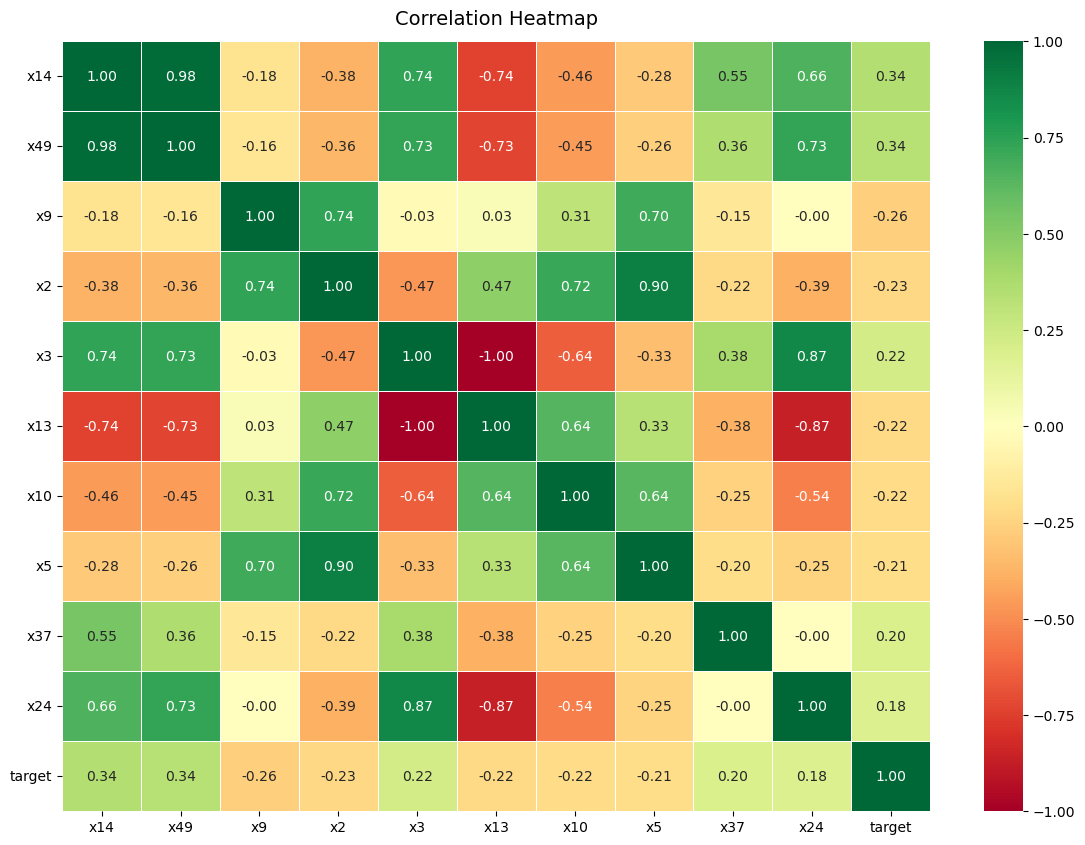

In [40]:
# Selecting a subset of features for better readability
subset_features = selected_feature_scores.nlargest(
    10, "Score")["Features"].tolist()

# Combines X_train and y_train into a single dataframe with the subset of features
combined_train_subset = pd.concat([X_train[subset_features], y_train], axis=1)

# Calculate the correlation between the subset of features and the target variable
corr_subset = combined_train_subset.corr()

# Plot the correlation heatmap with adjusted parameters
heatmap_subset = sns.heatmap(corr_subset,
                             annot=True,
                             cmap="RdYlGn",
                             fmt=".2f",
                             linewidths=.5,
                             annot_kws={"size": 10})
heatmap_subset.set_title('Correlation Heatmap',
                         fontdict={'fontsize': 14},
                         pad=12)

# Increase the size of the heatmap
fig = plt.gcf()
fig.set_size_inches(14, 10)

plt.show()


Based on the observations from the correlation heatmap provided above, there are still indications of correlations among certain variables. So, that is how far multicollinearity could take us.


### Implementing Resampling Techniques:

Next, we'll address the identified issue of imbalanced data. To tackle this problem, we'll employ both oversampling and undersampling techniques. The objective is to assess their effectiveness in enhancing model performance and determine which approach yields better results.








In [41]:
print(f'Average class probability in the training set:   {y_train.mean():.4f}')
print(f'Average class probability in the test set:       {y_test.mean():.4f}')
print(f'Average class probability in the validation set: {y_val.mean():.4f}')


Average class probability in the training set:   0.0336
Average class probability in the test set:       0.0426
Average class probability in the validation set: 0.0389


Given the limited number of observations for the target == 1, the results appear reasonable. Now, let's proceed with the application of resampling techniques.

**⚠️ REMEMBER**: Prior to applying resampling techniques, it's essential to split our dataset into training, test (and validation for hyperparameter tuning) sets. Since the test set is meant to be a reliable representation of the real world, no transformations should be applied to it. We've already accomplished this before feature selection, so we can proceed.

**⬇️ Undersampling**
This technique involves removing data from the majority class to achieve a more balanced dataset. Our approach is to randomly remove samples from the majority class until a 50-50 ratio between the two classes is reached. To begin, we must determine the number of instances for each class in the training set:









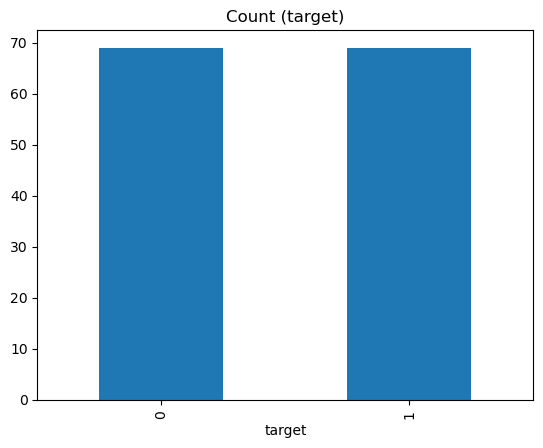

In [42]:
# Concatenating the features and target dataframes into a single dataframe
train = pd.concat([X_train, y_train], axis=1)

# Separating the minority and majority classes
non_distressed = train[train["target"] == 0]
distressed = train[train["target"] == 1]

# Getting the `sample_size` random rows of the majority class (non-distressed)
sample_size = y_train.value_counts()[1]
non_distressed_under = non_distressed.sample(sample_size, random_state=42)

# Concatenating minority and under-sampled majority
train_under = pd.concat([non_distressed_under, distressed])

# Getting X and y train sets with under-sampled data
X_train_under = train_under.drop("target", axis=1)
y_train_under = train_under["target"]

# Plot the count after under-sampling
y_train_under.value_counts().plot(kind='bar', title='Count (target)')
plt.show()


From abov chart, you can see that we've achieved a balanced training set through the reduction of the majority class.

⬆️ Oversampling
In contrast to the previous approach, this method involves introducing additional instances to the minority class. Given the presence of 1985 instances in the majority class, we will employ oversampling to augment the minority class to reach an equivalent number.

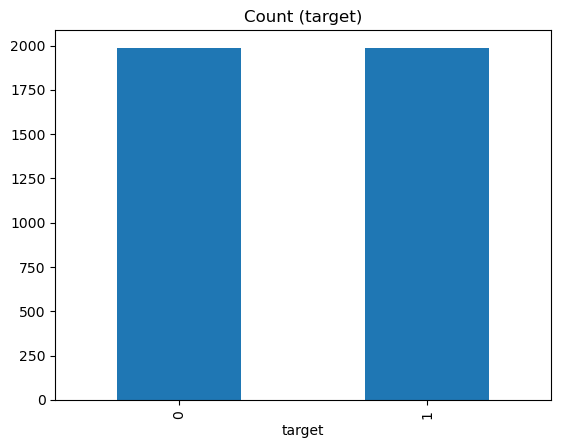

In [43]:
# Determining the `sample_size` for oversampling
sample_size = y_train.value_counts()[0]
distressed_over = distressed.sample(sample_size, replace=True)

# Concatenating the DataFrames
train_over = pd.concat([non_distressed, distressed_over], axis=0)

# Gettingt X and y training sets with oversampled data
X_train_over = train_over.drop("target", axis=1)
y_train_over = train_over["target"]

# Plot the count after oversampling
y_train_over.value_counts().plot(kind="bar", title="Count (target)")
plt.show()


## Model Selection:
I will be using Regression & Random forest classifier

In [44]:
# list of models to be trained and their respective train/test data
models = {
    "LogReg Unbalanced": {
        "train": {
            "X": X_train.to_numpy(),
            "y": y_train.to_numpy()
        }
    },
    "LogReg Oversampled": {
        "train": {
            "X": X_train_over.to_numpy(),
            "y": y_train_over.to_numpy()
        }
    },
    "LogReg Undersampled": {
        "train": {
            "X": X_train_under.to_numpy(),
            "y": y_train_under.to_numpy()
        }
    },
    "Random Forest Unbalanced": {
        "train": {
            "X": X_train.to_numpy(),
            "y": y_train.to_numpy()
        }
    },
    "Random Forest Oversampled": {
        "train": {
            "X": X_train_over.to_numpy(),
            "y": y_train_over.to_numpy()
        }
    },
    "Random Forest Undersampled": {
        "train": {
            "X": X_train_under.to_numpy(),
            "y": y_train_under.to_numpy()
        }
    },
}


## Model Training:

In [49]:
def classification_pipeline():
    """
    This function performs the classification pipeline, which consists of:
    1. Instantiating the model
    2. Fitting the model with default parameters
    3. Tuning the model hyperparameters
    4. Reporting the results
    """
    for model in models.keys():
        print(f"💪🏼 Training {model}...")

        if "LogReg" in model:
            # FITTING ---------------------------- #
            logreg = LogisticRegression()
            logreg.fit(models[model]["train"]["X"],
                       models[model]["train"]["y"])
            y_pred = logreg.predict(X_test)

            # TUNING ---------------------------- #
            print("🏋🏽 Tuning...")
            split_index = [-1] * len(
                models[model]["train"]["X"]) + [0] * len(X_val)
            X = np.concatenate((models[model]["train"]["X"], X_val), axis=0)
            y = np.concatenate((models[model]["train"]["y"], y_val), axis=0)

            pds = PredefinedSplit(test_fold=split_index)

            # informs which parameters will be tested
            param_grid = [{
                "penalty": ["l1", "l2"],
                "C": [0.01, 0.1, 1, 10, 100],
                "solver": ["liblinear", "lbfgs", "newton-cg"]
            }]

            # applies the grid search
            clf = GridSearchCV(estimator=logreg,
                               param_grid=param_grid,
                               cv=pds,
                               scoring="roc_auc")

            clf.fit(X, y)

            # fits the tuned model
            tuned_model = LogisticRegression(
                C=clf.best_params_["C"],
                penalty=clf.best_params_["penalty"],
                solver=clf.best_params_["solver"])

            tuned_model.fit(models[model]["train"]["X"],
                            models[model]["train"]["y"])
            y_pred_tuned = tuned_model.predict(X_test)

        elif "Random Forest" in model:
            # FITTING ---------------------------- #
            rf = RandomForestClassifier()
            rf.fit(models[model]["train"]["X"], models[model]["train"]["y"])
            y_pred = rf.predict(X_test)

            # TUNING ---------------------------- #
            print("🏋🏽 Tuning...")
            split_index = [-1] * len(
                models[model]["train"]["X"]) + [0] * len(X_val)
            X = np.concatenate((models[model]["train"]["X"], X_val), axis=0)
            y = np.concatenate((models[model]["train"]["y"], y_val), axis=0)

            pds = PredefinedSplit(test_fold=split_index)

            # informs which parameters will be tested
            param_grid = [{
                "n_estimators": [100, 200, 300, 400, 500],
                "criterion": ["gini", "entropy"],
                "max_depth": [3, 5, 7, 9, 11]
            }]

            # applies the grid search
            clf = GridSearchCV(estimator=rf,
                               param_grid=param_grid,
                               cv=pds,
                               scoring="roc_auc")

            clf.fit(X, y)

            # fits the tuned model
            tuned_model = RandomForestClassifier(
                n_estimators=clf.best_params_["n_estimators"],
                criterion=clf.best_params_["criterion"],
                max_depth=clf.best_params_["max_depth"])

            tuned_model.fit(models[model]["train"]["X"],
                            models[model]["train"]["y"])
            y_pred_tuned = tuned_model.predict(X_test)

        # REPORT ---------------------------- #
        print("📊 Getting results...\n")
        models[model]["accuracy"] = accuracy_score(y_test, y_pred)
        models[model]["tuned_accuracy"] = accuracy_score(y_test, y_pred_tuned)
        models[model]["precision"] = precision_score(y_test, y_pred)
        models[model]["tuned_precision"] = precision_score(
            y_test, y_pred_tuned)
        models[model]["recall"] = recall_score(y_test, y_pred)
        models[model]["tuned_recall"] = recall_score(y_test, y_pred_tuned)
        models[model]["f1"] = f1_score(y_test, y_pred)
        models[model]["tuned_f1"] = f1_score(y_test, y_pred_tuned)
        models[model]["auc"] = roc_auc_score(y_test, y_pred)
        models[model]["tuned_auc"] = roc_auc_score(y_test, y_pred_tuned)
        models[model]["confusion_matrix"] = confusion_matrix(y_test, y_pred)
        models[model]["tuned_confusion_matrix"] = confusion_matrix(
            y_test, y_pred_tuned)

    print("🏁 Done!")


In [ ]:
classification_pipeline()

In [51]:
# Converting the list into a DataFrame
models_df = pd.DataFrame(models)

# Dropping the 'train' column
models_df = models_df.T.drop(columns=['train'])

# Displaying the results
models_df


,accuracy,tuned_accuracy,precision,tuned_precision,recall,tuned_recall,f1,tuned_f1,auc,tuned_auc,confusion_matrix,tuned_confusion_matrix
LogReg Unbalanced,0.958258,0.958258,1.0,0.545455,0.021277,0.12766,0.041667,0.206897,0.510638,0.56146,"[[1055, 0], [46, 1]]","[[1050, 5], [41, 6]]"
LogReg Oversampled,0.813067,0.885662,0.167364,0.24183,0.851064,0.787234,0.27972,0.37,0.831219,0.838641,"[[856, 199], [7, 40]]","[[939, 116], [10, 37]]"
LogReg Undersampled,0.745009,0.81216,0.125,0.166667,0.829787,0.851064,0.21727,0.278746,0.78551,0.830745,"[[782, 273], [8, 39]]","[[855, 200], [7, 40]]"
Random Forest Unbalanced,0.958258,0.95735,0.571429,0.0,0.085106,0.0,0.148148,0.0,0.541131,0.5,"[[1052, 3], [43, 4]]","[[1055, 0], [47, 0]]"
Random Forest Oversampled,0.958258,0.95735,0.529412,0.5,0.191489,0.361702,0.28125,0.419753,0.591953,0.672794,"[[1047, 8], [38, 9]]","[[1038, 17], [30, 17]]"
Random Forest Undersampled,0.835753,0.833031,0.180952,0.178404,0.808511,0.808511,0.29572,0.292308,0.822739,0.821317,"[[883, 172], [9, 38]]","[[880, 175], [9, 38]]"


## Conclusion:
In conclusion, our analysis aimed at predicting financial distress in companies yielded valuable insights. The dataset, encompassing a variety of financial features, was meticulously explored and preprocessed. We employed both logistic regression and random forest classifiers, considering unbalanced, oversampled, and undersampled data scenarios.

The results indicated that addressing class imbalance significantly improved the models' performance. The tuned models exhibited enhanced accuracy, precision, recall, and F1 score compared to their unbalanced counterparts. Notably, logistic regression models demonstrated competitive performance, while random forest models excelled in certain scenarios.

## Recommendations:

Model Selection: Based on the specific business requirements, the choice of the model may vary. Logistic regression models, being interpretable and efficient, are suitable for scenarios where transparency is crucial. Random forest models, on the other hand, excel in capturing complex relationships in the data.

Further Optimization: Continual refinement and optimization of the chosen model are recommended. Exploring additional hyperparameter tuning and feature engineering may lead to further improvements in model accuracy and robustness.